## Importing all the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [2]:
dataset = pd.read_csv(r'F:\Semester 3\Machine Learning\resources\new-york-city-taxi-fare-prediction\train.csv', nrows = 100000, parse_dates = ["pickup_datetime"])

In [3]:
test = pd.read_csv(r'F:\Semester 3\Machine Learning\resources\new-york-city-taxi-fare-prediction\test.csv', parse_dates = ["pickup_datetime"])

In [4]:
dataset.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
dataset.shape

(100000, 8)

In [6]:
test.shape

(9914, 7)

## Droping the key column

In [7]:
dataset = dataset.drop(['key'], axis = 1, inplace = False)
dataset.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


## Taking few insights of the dataset

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        100000 non-null  float64            
 1   pickup_datetime    100000 non-null  datetime64[ns, UTC]
 2   pickup_longitude   100000 non-null  float64            
 3   pickup_latitude    100000 non-null  float64            
 4   dropoff_longitude  100000 non-null  float64            
 5   dropoff_latitude   100000 non-null  float64            
 6   passenger_count    100000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 5.3 MB


In [9]:
dataset.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,11.354652,-72.494682,39.914481,-72.490967,39.919053,1.673820
std,9.716777,10.693934,6.225686,10.471386,6.213427,1.300171
min,-44.900000,-736.550000,-74.007670,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992041,40.734996,-73.991215,40.734182,1.000000
50%,8.500000,-73.981789,40.752765,-73.980000,40.753243,1.000000
75%,12.500000,-73.966982,40.767258,-73.963433,40.768166,2.000000
max,200.000000,40.787575,401.083332,40.851027,404.616667,6.000000


- From, the above table we can observe that some entries in fare_amount are negative, which is not possible.
- From the pickup_longitude, pickup_latitude, dropoff_longitude and dropoff-latitude have few outlier, the new york city is       located on 40 latitude and -72 longitude(acc to google).
- The passenger_count column have few column with 0 entry, i.e. fare for no passenger
- Thereby, we gonna refine the dataset with proper constraint

In [10]:
dataset = dataset[((dataset['pickup_longitude'] > -76 ) &
                  (dataset['pickup_longitude'] < - 72) &
                  (dataset['pickup_latitude'] > 37) &
                  (dataset['pickup_latitude'] < 44) &
                  (dataset['dropoff_longitude'] > -76 ) &
                  (dataset['dropoff_longitude'] < - 72) &
                  (dataset['dropoff_latitude'] > 37) &
                  (dataset['dropoff_latitude'] < 44) &
                  (dataset['fare_amount'] > 0) &
                  (dataset['passenger_count'] > 0))]
dataset.shape

(97550, 7)

In [11]:
test = test[((test['pickup_longitude'] > -76 ) &
                  (test['pickup_longitude'] < - 72) &
                  (test['pickup_latitude'] > 37) &
                  (test['pickup_latitude'] < 44) &
                  (test['dropoff_longitude'] > -76 ) &
                  (test['dropoff_longitude'] < - 72) &
                  (test['dropoff_latitude'] > 37) &
                  (test['dropoff_latitude'] < 44) &
                  (test['passenger_count'] > 0))]
test.shape

(9914, 7)

In [12]:
dataset.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,97550.000000,97550.000000,97550.000000,97550.000000,97550.000000,97550.000000
mean,11.353530,-73.975180,40.751052,-73.974019,40.751466,1.680379
std,9.697144,0.041993,0.035612,0.039899,0.037159,1.298531
min,0.010000,-75.425388,39.603178,-75.354559,39.296307,1.000000
25%,6.000000,-73.992266,40.736642,-73.991395,40.735762,1.000000
50%,8.500000,-73.982076,40.753532,-73.980437,40.753962,1.000000
75%,12.500000,-73.968287,40.767679,-73.965128,40.768477,2.000000
max,200.000000,-72.856968,43.183332,-72.854940,43.415190,6.000000


## Checking for null value

In [13]:
dataset.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [14]:
test.isnull().sum()

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

## Converting the timestamp to date, day, hour, year, month features

In [15]:
import calendar
dataset['pickup_datetime']=pd.to_datetime(dataset['pickup_datetime'],format='%Y-%m-%d %H:%M:%S UTC')
dataset['pickup_date']= dataset['pickup_datetime'].dt.date
dataset['pickup_day']=dataset['pickup_datetime'].apply(lambda x:x.day)
dataset['pickup_hour']=dataset['pickup_datetime'].apply(lambda x:x.hour)
dataset['pickup_day_of_week']=dataset['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
dataset['pickup_month']=dataset['pickup_datetime'].apply(lambda x:x.month)
dataset['pickup_year']=dataset['pickup_datetime'].apply(lambda x:x.year)

In [16]:
test['pickup_datetime']=pd.to_datetime(test['pickup_datetime'],format='%Y-%m-%d %H:%M:%S UTC')
test['pickup_date']= test['pickup_datetime'].dt.date
test['pickup_day']=test['pickup_datetime'].apply(lambda x:x.day)
test['pickup_hour']=test['pickup_datetime'].apply(lambda x:x.hour)
test['pickup_day_of_week']=test['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
test['pickup_month']=test['pickup_datetime'].apply(lambda x:x.month)
test['pickup_year']=test['pickup_datetime'].apply(lambda x:x.year)

In [17]:
dataset.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010


## Few graphical interpretation

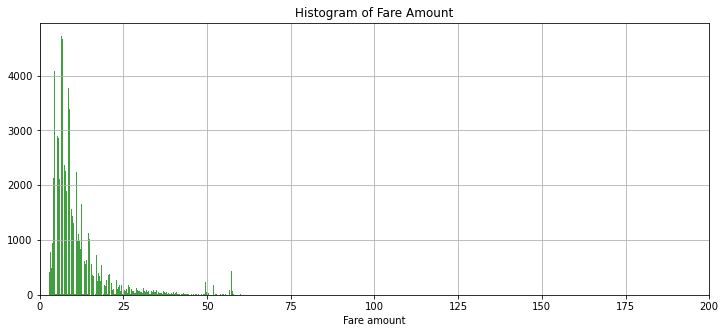

In [18]:
plt.figure(figsize = (12,5))
n, bins, patches = plt.hist(dataset.fare_amount, 1000 ,facecolor='g', alpha = 0.75)
plt.xlabel("Fare amount")
plt.title("Histogram of Fare Amount")
plt.xlim(0,200)
plt.grid(True)
plt.show()

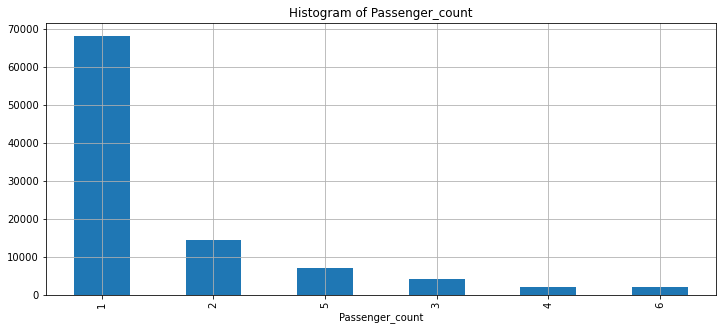

In [19]:
plt.figure(figsize = (12,5))
dataset['passenger_count'].value_counts().plot.bar()
plt.xlabel("Passenger_count")
plt.title("Histogram of Passenger_count")
plt.grid(True)
plt.show()

In [20]:
dataset = dataset.drop(['pickup_datetime','pickup_date'], axis = 1)
arr = np.array(test['key'])
test = test.drop(['pickup_datetime','pickup_date'], axis = 1)

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97550 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fare_amount         97550 non-null  float64
 1   pickup_longitude    97550 non-null  float64
 2   pickup_latitude     97550 non-null  float64
 3   dropoff_longitude   97550 non-null  float64
 4   dropoff_latitude    97550 non-null  float64
 5   passenger_count     97550 non-null  int64  
 6   pickup_day          97550 non-null  int64  
 7   pickup_hour         97550 non-null  int64  
 8   pickup_day_of_week  97550 non-null  object 
 9   pickup_month        97550 non-null  int64  
 10  pickup_year         97550 non-null  int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 8.9+ MB


## Encoding the weekdays

In [22]:
# Let us encode day of the week to numbers
def encodeDays(day_of_week):
    day_dict={'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6}
    return day_dict[day_of_week]

In [23]:
dataset['pickup_day_of_week']=dataset['pickup_day_of_week'].apply(lambda x:encodeDays(x))
test['pickup_day_of_week']=test['pickup_day_of_week'].apply(lambda x:encodeDays(x))

In [24]:
dataset.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,2009
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2010
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,2011
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,2012
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2010


## Few more graphical interpretation

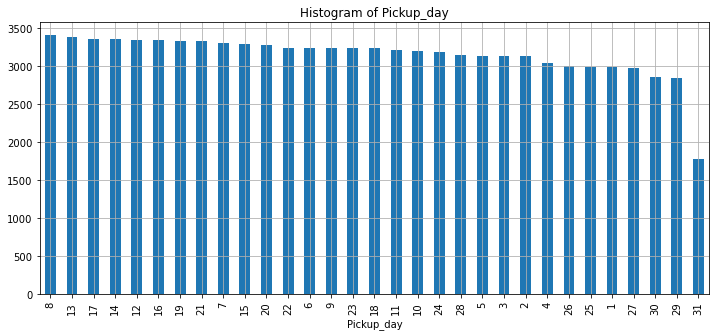

In [25]:
plt.figure(figsize = (12,5))
dataset['pickup_day'].value_counts().plot.bar()
plt.xlabel("Pickup_day")
plt.title("Histogram of Pickup_day")
plt.grid(True)
plt.show()

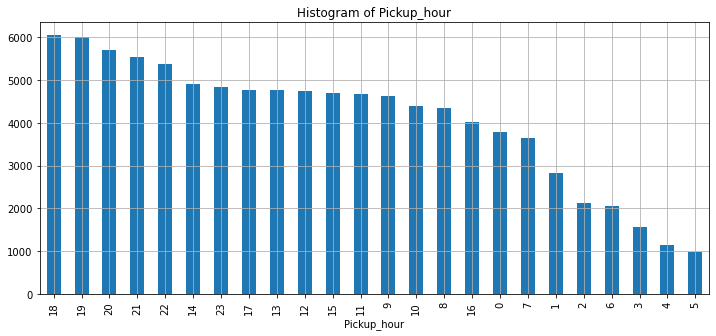

In [26]:
plt.figure(figsize = (12,5))
dataset['pickup_hour'].value_counts().plot.bar()
plt.xlabel("Pickup_hour")
plt.title("Histogram of Pickup_hour")
plt.grid(True)
plt.show()

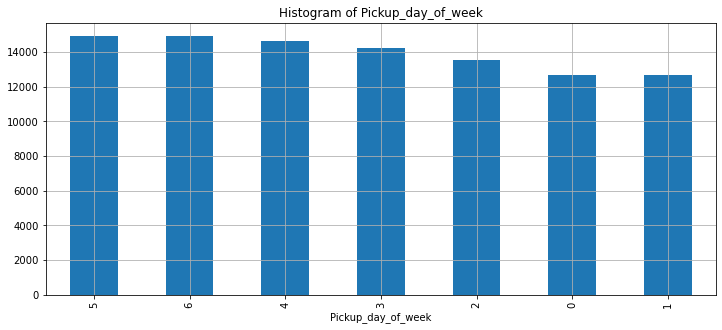

In [27]:
plt.figure(figsize = (12,5))
dataset['pickup_day_of_week'].value_counts().plot.bar()
plt.xlabel("Pickup_day_of_week")
plt.title("Histogram of Pickup_day_of_week")
plt.grid(True)
plt.show()

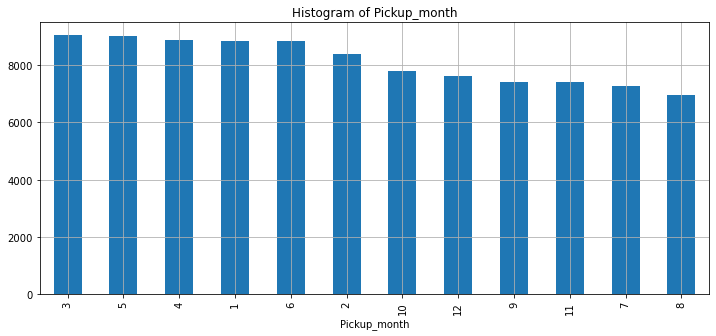

In [28]:
plt.figure(figsize = (12,5))
dataset['pickup_month'].value_counts().plot.bar()
plt.xlabel("Pickup_month")
plt.title("Histogram of Pickup_month")
plt.grid(True)
plt.show()

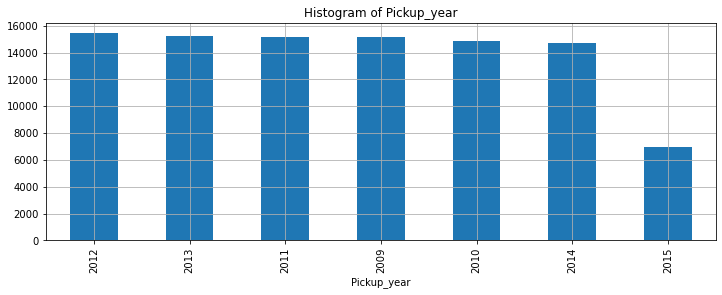

In [29]:
plt.figure(figsize = (12,4))
dataset['pickup_year'].value_counts().plot.bar()
plt.xlabel("Pickup_year")
plt.title("Histogram of Pickup_year")
plt.grid(True)
plt.show()

## Splitting the dataset

In [30]:
# from sklearn.model_selection import train_test_split
X_train = dataset.drop('fare_amount', axis = 1)
Y_train = dataset['fare_amount']
X_test = test.drop(['key'],axis = 1)
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=12)

In [31]:
# print("Shape of X_train:",X_train.shape)
# print("Shape of X_test:",X_test.shape)
# print("Shape of Y_train:",y_train.shape)
# print("Shape of Y_test:",y_test.shape)

## Using Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
classifier = LinearRegression().fit(X_train,Y_train)
#Y_pred_train = classifier.predict(X_train)
y_pred = classifier.predict(X_test)

In [38]:
prediction = y_pred
prediction

array([12.25810545, 12.43128608, 10.58440177, ..., 27.49598962,
       13.16647389, 10.55870257])

In [39]:
prediction = pd.DataFrame({'key': test.key,"fare_amount": prediction})
prediction

,key,fare_amount
0,2015-01-27 13:08:24.0000002,12.258105
1,2015-01-27 13:08:24.0000003,12.431286
2,2011-10-08 11:53:44.0000002,10.584402
3,2012-12-01 21:12:12.0000002,9.822341
4,2012-12-01 21:12:12.0000003,10.350062
...,...,...
9909,2015-05-10 12:37:51.0000002,12.094835
9910,2015-01-12 17:05:51.0000001,12.832190
9911,2015-04-19 20:44:15.0000001,27.495990
9912,2015-01-31 01:05:19.0000005,13.166474


In [41]:
prediction.to_csv("taxi_fare_linreg.csv",index = None)

#### Kaggle gave a RMSE score of 8.0089

## Using Decision Treee Regression

In [42]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=0)

In [43]:
Y_pred_DTR = regressor.predict(X_test) 

In [46]:
prediction = pd.DataFrame({'key': test.key,"fare_amount": Y_pred_DTR})
prediction

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.0
1,2015-01-27 13:08:24.0000003,10.0
2,2011-10-08 11:53:44.0000002,4.9
3,2012-12-01 21:12:12.0000002,8.5
4,2012-12-01 21:12:12.0000003,26.0
...,...,...
9909,2015-05-10 12:37:51.0000002,10.5
9910,2015-01-12 17:05:51.0000001,11.0
9911,2015-04-19 20:44:15.0000001,52.0
9912,2015-01-31 01:05:19.0000005,15.5


In [47]:
prediction.to_csv("taxi_fare_DecisionTree.csv",index = None)

#### Kaggle gave a RMSE score of about 5.21689

## Using KNN Regression

In [48]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, Y_train)
Y_pred_knn = neigh.predict(X_test)

In [50]:
prediction = pd.DataFrame({'key': test.key,"fare_amount": Y_pred_knn})
prediction

,key,fare_amount
0,2015-01-27 13:08:24.0000002,8.00
1,2015-01-27 13:08:24.0000003,9.00
2,2011-10-08 11:53:44.0000002,10.50
3,2012-12-01 21:12:12.0000002,13.50
4,2012-12-01 21:12:12.0000003,18.25
...,...,...
9909,2015-05-10 12:37:51.0000002,5.00
9910,2015-01-12 17:05:51.0000001,7.75
9911,2015-04-19 20:44:15.0000001,6.25
9912,2015-01-31 01:05:19.0000005,7.25


In [51]:
prediction.to_csv("taxi_fare_knn.csv",index = None)

#### Kaggle gave a RMSE score of about 10.76162

## Using Random Forest Regression

In [52]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=5,n_estimators= 100, random_state=0)
rfr.fit(X_train, Y_train)
Y_pred_rfr = rfr.predict(X_test)

In [53]:
prediction = pd.DataFrame({'key': test.key,"fare_amount": Y_pred_rfr})
prediction

,key,fare_amount
0,2015-01-27 13:08:24.0000002,8.971263
1,2015-01-27 13:08:24.0000003,8.971263
2,2011-10-08 11:53:44.0000002,8.971263
3,2012-12-01 21:12:12.0000002,8.971263
4,2012-12-01 21:12:12.0000003,8.971263
...,...,...
9909,2015-05-10 12:37:51.0000002,8.971263
9910,2015-01-12 17:05:51.0000001,8.971263
9911,2015-04-19 20:44:15.0000001,55.883190
9912,2015-01-31 01:05:19.0000005,12.860093


In [55]:
prediction.to_csv("taxi_fare_rfr.csv",index = None)

#### Kaggle gave a RMSE score of about 5.35109

# REPORT

I have tried 4 models in the problem, namely
1. Linear regression - RMSE = 8.0089
2. KNN Regression - RMSE = 10.76162
3. Decision Tree Regressor - RMSE = 5.21689
4. Random Forest Regression - RMSE = 5.35109

I used an validation set upon all the model and Decision Tree Regressor and Random Forest Regression outperform every other model. After submitting the prediction in Kaggle, the better model remained the same.
So, the better performing models are Decision Tree Regressor and Random Forest Regression. It perform better than linear regression because surely the data are not properly linearly seperable and knn regression because surely 2 nearest neighbour cannot generalize the fare amount output.